In [103]:
import sys
sys.path.append('/Users/calvinsmith/dufresne_lab/phase_space_search')
import flory_classifier_v2 
from flory_classifier_v2 import FloryClassifier
import h5py
import importlib
import numpy as np
import matplotlib.pyplot as plt

importlib.reload(flory_classifier_v2)


2.0.0


<module 'flory_classifier_v2' from '/Users/calvinsmith/dufresne_lab/phase_space_search/flory_classifier_v2.py'>

In [84]:

test = FloryClassifier()

In [85]:
test.reset_rand_chi_matrix(3,4)

Reset CHI_MATRIX: 
 [[0.         3.39045189 4.15908512]
 [3.39045189 0.         4.07788978]
 [4.15908512 4.07788978 0.        ]]


In [86]:
test.get_info()

num_comps: 3 
H_DIM: 1
Phi_out_vector: [0.1, 0.1]
Phi_in_comps: 0
Phi_in_range: [0.02, 0.2]
num_of_points: 0
CHI_STRENGTH: 4 
 CHI_MATRIX: 
 [[0.         3.39045189 4.15908512]
 [3.39045189 0.         4.07788978]
 [4.15908512 4.07788978 0.        ]]
REMAINING SOLVENT: 0.8
H component 0.8


In [105]:
test.generate_grid_data_N_Dim(1,100,True)


📂 chi_matrix_0:
  ├── initial_points: (66, 3)
  ├── chi_matrix: (3, 3)
  ├── evolved_phases:
      ├── volumes: (66, 3)
      ├── comp_fracs: (66, 2, 3)
      ├── num_phases: (66,)
      ├── num_phases sample: [2. 2. 2. 2. 1.]


In [108]:
folder_path = "/Users/calvinsmith/dufresne_lab/phase_space_search/Saved_Phase_Data/"
file_path = f"{folder_path}grid_phase_data_v2_20250216_132301.h5"

# Open the HDF5 file
with h5py.File(file_path, 'r') as hf:
    for chi_key in hf.keys():
        print(f"\n📂 {chi_key}:")  # Print the chi_matrix group name
        
        g1 = hf[chi_key]
        
        # Print initial data
        print("  ├── initial_points:", g1["initial_points"][:].shape)
        print("  ├── chi_matrix:", g1["chi_matrix"][:].shape)
        
        # Access evolved phases
        if "evolved_phases" in g1:
            g2 = g1["evolved_phases"]
            print("  ├── evolved_phases:")
            print("      ├── volumes:", g2["volumes"][:].shape)
            print("      ├── comp_fracs:", g2["comp_fracs"][:].shape)
            print("      ├── num_phases:", g2["num_phases"][:].shape)
            
            # Optionally print a small sample of the data
            print("      ├── num_phases sample:", g2["num_phases"][:5])  # First 5 values



📂 chi_matrix_0:
  ├── initial_points: (66, 3)
  ├── chi_matrix: (3, 3)
  ├── evolved_phases:
      ├── volumes: (66, 3)
      ├── comp_fracs: (66, 2, 3)
      ├── num_phases: (66,)
      ├── num_phases sample: [2. 2. 2. 2. 1.]


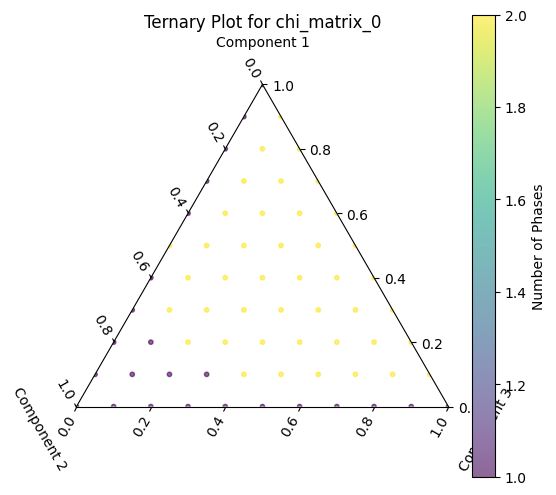

In [110]:
folder_path = "/Users/calvinsmith/dufresne_lab/phase_space_search/Saved_Phase_Data/"
file_path = f"{folder_path}grid_phase_data_v2_20250216_132301.h5"


# Open the HDF5 file
with h5py.File(file_path, 'r') as hf:
    for chi_key in hf.keys():
        g1 = hf[chi_key]

        # Extract initial points and number of phases
        points = g1["initial_points"][:]
        num_phases = np.ravel(g1["evolved_phases"]["num_phases"][:])  # Flatten to 1D

        # Normalize points for ternary plot (ensure they sum to 1)
        points /= np.sum(points, axis=1, keepdims=True)

        # Create a ternary plot using mpltern
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'ternary'})

        # Plot initial points with color indicating the number of phases
        scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], 
                             c=num_phases, cmap='viridis', alpha=0.6, s=10)

        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label("Number of Phases")

        # Set ternary axis labels
        ax.set_tlabel("Component 1")
        ax.set_llabel("Component 2")
        ax.set_rlabel("Component 3")
        # Title
        ax.set_title(f"Ternary Plot for {chi_key}")

        # Show plot